In [24]:
# See end to end vector of the mean twist
import MDAnalysis as md
import matplotlib.pyplot as plt
import numpy as np

u = md.Universe('md_1.tpr', 'md_1_noPBC.xtc')
u.trajectory[-1]
protein = u.select_atoms("protein")
backbn = protein.select_atoms("backbone")
xd, yd, zd = u.trajectory[-1].dimensions[0:3]/10

t_eq = 10000 # ps
# Time Data
ti = u.trajectory[0].time
tf = u.trajectory[-1].time
nt = len(u.trajectory)-1
deltat = (tf-ti)/nt
t = np.linspace(ti,tf,nt+1)
mask = (t >= t_eq)

In [25]:
# Get the Coordinates through time of a Molecule
mol = 0
coords_saving = []
for ts in u.trajectory[mask]:
    # chains = protein.fragments[3*mol:3*mol + 3]
    chains = backbn.fragments[3*mol:3*mol + 3]
    colmol = chains[0] + chains[1] + chains[2]
    coords = colmol.positions / 10
    coords_saving.append(coords)

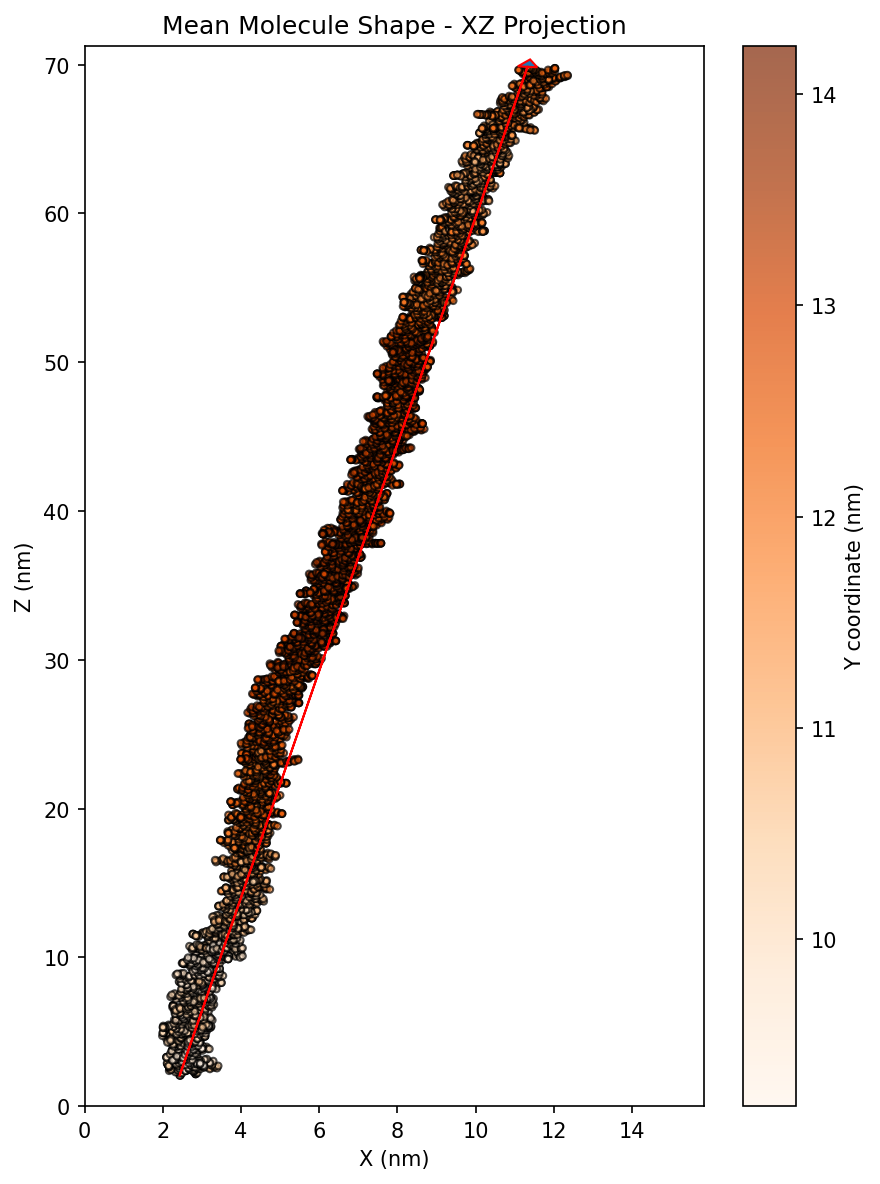

In [ ]:
# Get the mean atoms position and see the end to end vector
mean_atoms = np.mean(coords_saving, 0)

plt.figure(figsize=(6,8), dpi=150)

# Molecule
sc = plt.scatter(mean_atoms[:, 0], mean_atoms[:,2], c=mean_atoms[:,1], cmap='Oranges', s=10, edgecolor='k', alpha=0.7)
plt.colorbar(sc, label='Y coordinate (nm)')

# End to End Vector - Atoms
atom_low = mean_atoms[mean_atoms[:, 2] == min(mean_atoms[:, 2])][0]
atom_high = mean_atoms[mean_atoms[:, 2] == max(mean_atoms[:, 2])][0]

plt.arrow(atom_low[0], atom_low[2], atom_high[0]-atom_low[0], atom_high[2]-atom_low[2], 
         head_width=0.5, head_length=0.5, ec='r')

plt.xlabel("X (nm)")
plt.ylabel("Z (nm)")
plt.title("Mean Molecule Shape - XZ Projection")
plt.xlim(0, xd)
plt.ylim(0, zd)
plt.tight_layout()
plt.show()

In [ ]:
# Get all the end-to-end vectors (atoms)
tot_mol = int((protein.fragindices[-1] + 1)/3)
high_atoms = []
low_atoms = []

for mol in range(tot_mol):
    i = 0
    coords_saving = []
    for ts in u.trajectory[mask]:
        # chains = protein.fragments[3*mol:3*mol + 3]
        chains = backbn.fragments[3*mol:3*mol + 3]
        colmol = chains[0] + chains[1] + chains[2]
        coords = colmol.positions / 10
        coords_saving.append(coords)
    
    mean_atoms = np.mean(coords_saving, 0)
    atom_low = mean_atoms[mean_atoms[:, 2] == min(mean_atoms[:, 2])][0]
    atom_high = mean_atoms[mean_atoms[:, 2] == max(mean_atoms[:, 2])][0]
    low_atoms.append(atom_low)
    high_atoms.append(atom_high)


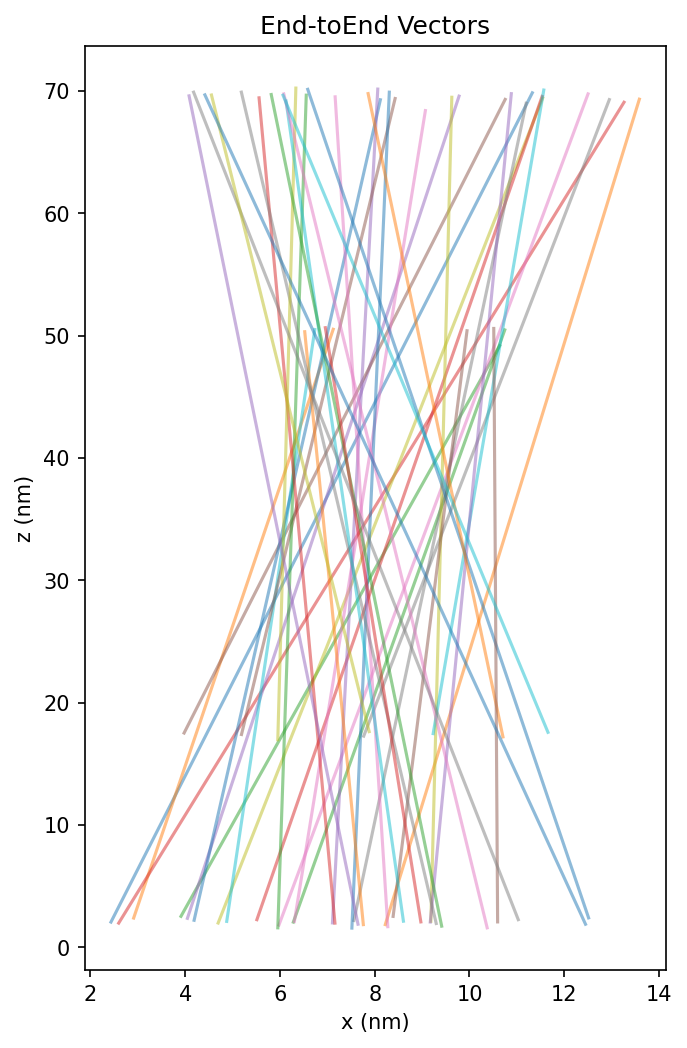

In [39]:
low_atoms = np.array(low_atoms)
high_atoms = np.array(high_atoms)

plt.figure(figsize=(5, 8), dpi=150)

for i in range(tot_mol):
    x = [low_atoms[i, 0], high_atoms[i, 0]]
    z = [low_atoms[i, 2], high_atoms[i, 2]]
    
    plt.plot(x, z, alpha = 0.5)

plt.ylabel('z (nm)')
plt.xlabel('x (nm)')
plt.title('End-toEnd Vectors')
plt.show()